C:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 0.3904 - accuracy: 0.8295 - val_loss: 0.3299 - val_accuracy: 0.8595
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8665 - val_loss: 0.3245 - val_accuracy: 0.8610
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3132 - accuracy: 0.8679 - val_loss: 0.3454 - val_accuracy: 0.8549
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3096 - accuracy: 0.8678 - val_loss: 0.3241 - val_accuracy: 0.8593
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3059 - accuracy: 0.8715 - val_loss: 0.3220 - val_accuracy: 0.8610
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2998 - accuracy: 0.8723 - val_loss: 0.3253 - val_accuracy: 0.8594
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2926 - accuracy: 0.8755 - val_loss: 0.3340 - val_accuracy: 0.8548
Epoch 

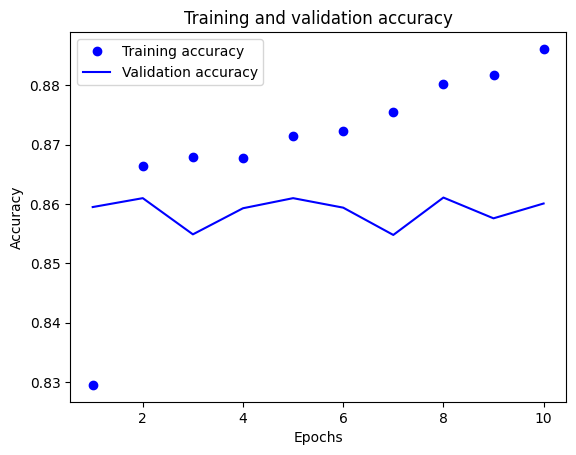

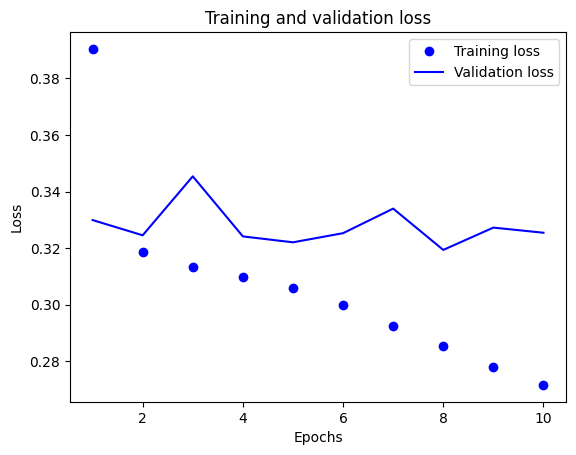

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras import layers
from keras import models
from keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv("imdbdataset.csv")

# Tokenize the text data
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(train_df["review"])
x_train = tokenizer.texts_to_matrix(train_df["review"], mode="binary")

# Convert the sentiment labels to binary format
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df["sentiment"]).astype("float32")

# Define the model
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(1000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# Plot the training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
